## Import important libraries 

In [2]:
import pandas as pd

## 1. Loading Dataset

In [3]:
df = pd.read_csv('CondoData_Regex7920231237.csv')

In [4]:
df.shape

(1547, 15)

In [5]:
df.head()

,Ad ID,Category,Locations,Posted,Size(m2),Bedroom,Bathroom,Link,Title,Price,Post Description,Sub Location,Bedrooms,Bathrooms,Floor
0,8538993,Condo for Sale,Phnom Penh,06-Jul-23,34,NaN,NaN,https://www.khmer24.com/en/property/new-condo-...,New condo for sell,"$58,000","Very special promotion!! Full price $58,000 bu...",Toul Kork,1.0,1.0,6.0
1,8517524,Condo for Sale,Phnom Penh,06-Jul-23,58,NaN,NaN,https://www.khmer24.com/en/property/vista-cond...,Vista Condo Aeon2 Urgent,"$75,000",ខុនដូសម្រាប់លក់ VISTA Condo\n\r\n(English Belo...,Sen Sok,NaN,NaN,19.0
2,9617339,Condo for Sale,Phnom Penh,03-Jul-23,34,NaN,NaN,https://www.khmer24.com/en/property/condo-uk-5...,Condo UK 548 for Sales,"$42,000",បន្ទប់ខុនដូប្រភេទ Studio (UK Condo 548)\n\rកណ្...,NaN,NaN,NaN,15.0
3,9617339,Condo for Sale,Phnom Penh,03-Jul-23,34,NaN,NaN,https://www.khmer24.com/en/property/condo-%E1%...,Condo សម្រាប់ជួល/Condo for Rent (The Peak Priv...,$800,Property Code: VBRE00586\n\r\nCondo សម្រាប់ជួល...,Chamkar Mon,1.0,NaN,NaN
4,8134344,Condo for Sale,Phnom Penh,09-Apr-23,57,NaN,NaN,https://www.khmer24.com/en/property/condo-for-...,Condo for sale 57m2,"$72,000",Fully furnished condo for sale / rent \n\nOwne...,NaN,1.0,1.0,9.0


## 2. Data Cleaning

In [6]:
df_new = df.copy()

In [7]:
df_new.columns

Index(['Ad ID ', 'Category ', 'Locations ', 'Posted ', 'Size(m2)', 'Bedroom',
       'Bathroom', 'Link', 'Title', 'Price', 'Post Description',
       'Sub Location', 'Bedrooms', 'Bathrooms', 'Floor'],
      dtype='object')

In [8]:
df_new.drop(['Ad ID ','Bedroom','Bathroom','Category ','Post Description','Link','Title'], axis =1, inplace=True)

In [9]:
df_new.head()

,Locations,Posted,Size(m2),Price,Sub Location,Bedrooms,Bathrooms,Floor
0,Phnom Penh,06-Jul-23,34,"$58,000",Toul Kork,1.0,1.0,6.0
1,Phnom Penh,06-Jul-23,58,"$75,000",Sen Sok,NaN,NaN,19.0
2,Phnom Penh,03-Jul-23,34,"$42,000",NaN,NaN,NaN,15.0
3,Phnom Penh,03-Jul-23,34,$800,Chamkar Mon,1.0,NaN,NaN
4,Phnom Penh,09-Apr-23,57,"$72,000",NaN,1.0,1.0,9.0


In [10]:
df_new.shape

(1547, 8)

In [11]:
# Format Data type

df_new['Size(m2)']=df_new['Size(m2)'].astype(float)
df_new['Floor']=pd.to_numeric(df_new['Floor'], errors='coerce')
df_new['Price']=df_new['Price'].str.replace('$','').str.replace(',','').astype(float)

In [12]:
df_new.isnull().sum()

Locations          0
Posted             0
Size(m2)           0
Price              0
Sub Location     931
Bedrooms         766
Bathrooms       1025
Floor            864
dtype: int64

In [13]:
columns_na = [columns for columns in df_new.columns if df_new[columns].isnull().sum()>1]

In [14]:
import numpy as np

In [15]:
for colunm in columns_na:
    print(colunm, np.round(df[colunm].isnull().mean()*100,3),'% Missing Values')

Sub Location 60.181 % Missing Values
Bedrooms 49.515 % Missing Values
Bathrooms 66.257 % Missing Values
Floor 55.85 % Missing Values


## Checking Duplicated Values

In [16]:
df_new.duplicated().sum()

28

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Locations     1547 non-null   object 
 1   Posted        1547 non-null   object 
 2   Size(m2)      1547 non-null   float64
 3   Price         1547 non-null   float64
 4   Sub Location  616 non-null    object 
 5   Bedrooms      781 non-null    float64
 6   Bathrooms     522 non-null    float64
 7   Floor         683 non-null    float64
dtypes: float64(5), object(3)
memory usage: 96.8+ KB


In [18]:
import matplotlib.pyplot as plt

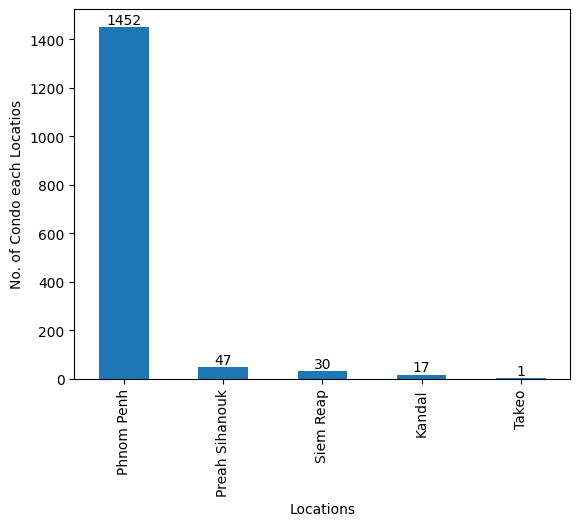

In [19]:
ax = df_new['Locations '].value_counts().plot(kind = 'bar')
plt.xlabel('Locations')
plt.ylabel('No. of Condo each Locatios')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), p.get_height(), ha='center', va='bottom')
plt.show()

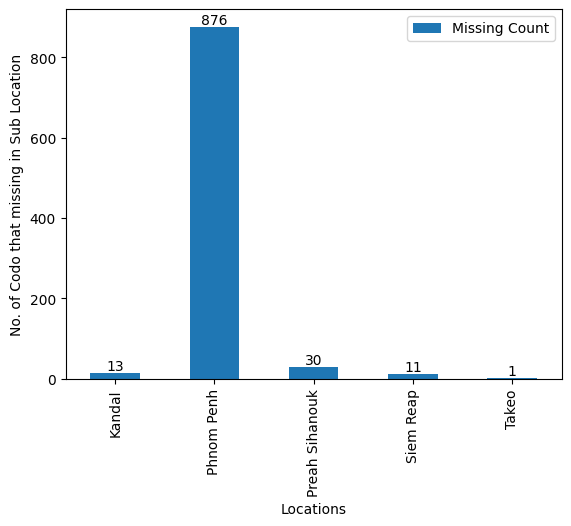

In [20]:
# Assuming df_new and df_new1 are your dataframes

missing_counts = df_new[df_new['Sub Location'].isnull()].groupby('Locations ').size().reset_index(name='Missing Count')

ax = missing_counts.plot(kind='bar', x='Locations ', y='Missing Count')
plt.xlabel('Locations')
plt.ylabel('No. of Codo that missing in Sub Location')

# Loop over the bars and add the text

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), p.get_height(), ha='center', va='bottom')

plt.show()

## Fill Missing Values in Sub Location Feature

- Based on my research, you can see that some of the sub places where most condos are in each province are:

- Phnom Penh: Chamkar Mon, Chraoy Chongvar, Tuol Kouk, Doun Penh, Saensokh
- Preah Sihanouk: Sihanoukville, Prey Nob
- Takeo: Daun Keo
- Siem Reap: Svay Dangkum, Sala Kamreuk, Slor Kram
- Kandal: Takhmao

In [21]:
default_sub_locations = {
    "Phnom Penh": "Chamkar Mon",
    "Preah Sihanouk": "Sihanoukville",
    "Takeo": "Daun Keo",
    "Siem Reap": "Svay Dangkum",
    "Kandal": "Takhmao"
} # create a dictionary of default sub locations
df_new["Sub Location"] = df_new["Sub Location"].fillna(df_new["Locations "].map(default_sub_locations)) 

In [22]:
replace_values = {
    "Kampong Som": "Prey Nob",
    "Near Angkor Wat": "Svay Dangkum",
    "Aeon": "Sen Sok"
}

In [23]:
df_new["Sub Location"] = df_new["Sub Location"].replace(replace_values)

In [24]:
df_new1 = df_new.copy()

In [25]:
df_new1['Sub Location'].unique()

array(['Toul Kork', 'Sen Sok', 'Chamkar Mon', 'Chroy Changvar',
       'Mean Chey', 'Prey Nob', 'Prampir Makara', 'Boeng Keng Kang',
       'Sihanoukville', 'Russey Keo', 'Daun Penh', 'Daun Keo',
       'Pur Senchey', 'Svay Dangkum', 'Takhmao', 'Chbar Ampov'],
      dtype=object)

In [26]:
df_new1['Locations '].unique()

array(['Phnom Penh', 'Preah Sihanouk', 'Takeo', 'Siem Reap', 'Kandal'],
      dtype=object)

In [27]:
valid_sub_locations = {
    "Kandal": ["Takhmao"],
    "Phnom Penh": ["Chamkar Mon", "Sen Sok", "Toul Kork", "Chroy Changvar", "Boeng Keng Kang", "Pur Senchey", "Daun Penh", "Mean Chey", "Prampir Makara", "Chbar Ampov", "Russey Keo"],
    "Preah Sihanouk": ["Sihanoukville", "Prey Nob"],
    "Siem Reap": ["Svay Dangkum"],
    "Takeo": ["Daun Keo"]
}

mask = df_new1.apply(lambda x: x['Sub Location'] in valid_sub_locations.get(x['Locations '], []), axis=1)
df_new1 = df_new1[mask]

In [28]:
df_new1

,Locations,Posted,Size(m2),Price,Sub Location,Bedrooms,Bathrooms,Floor
0,Phnom Penh,06-Jul-23,34.0,58000.0,Toul Kork,1.0,1.0,6.0
1,Phnom Penh,06-Jul-23,58.0,75000.0,Sen Sok,NaN,NaN,19.0
2,Phnom Penh,03-Jul-23,34.0,42000.0,Chamkar Mon,NaN,NaN,15.0
3,Phnom Penh,03-Jul-23,34.0,800.0,Chamkar Mon,1.0,NaN,NaN
4,Phnom Penh,09-Apr-23,57.0,72000.0,Chamkar Mon,1.0,1.0,9.0
...,...,...,...,...,...,...,...,...
1542,Phnom Penh,07-Jul-23,57.0,900.0,Chamkar Mon,1.0,1.0,31.0
1543,Phnom Penh,08-Jul-23,298616.0,17900.0,Chamkar Mon,2.0,NaN,NaN
1544,Phnom Penh,07-Jul-23,119.0,350000.0,Sen Sok,3.0,2.0,24.0
1545,Phnom Penh,07-Jul-23,32.0,10000.0,Russey Keo,1.0,1.0,NaN


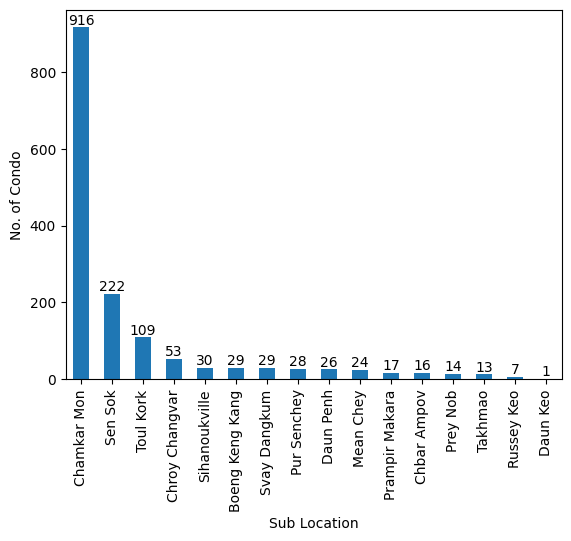

In [29]:
ax = df_new1['Sub Location'].value_counts().plot(kind = 'bar')
plt.xlabel('Sub Location')
plt.ylabel('No. of Condo')
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), p.get_height(), ha='center', va='bottom')
plt.show()

## 2.1 Insight Missing Values on Features Bedrooms, Bathrooms and Floor

In [30]:
df_new1.columns

Index(['Locations ', 'Posted ', 'Size(m2)', 'Price', 'Sub Location',
       'Bedrooms', 'Bathrooms', 'Floor'],
      dtype='object')

In [31]:
df_new1[['Bedrooms', 'Bathrooms','Floor']].describe()

,Bedrooms,Bathrooms,Floor
count,775.000000,515.000000,677.000000
mean,8.112258,1.485437,14.912851
std,144.449455,0.906785,10.767435
min,0.000000,1.000000,1.000000
25%,1.000000,1.000000,8.000000
50%,1.000000,1.000000,12.000000
75%,2.000000,2.000000,19.000000
max,4000.000000,15.000000,119.000000


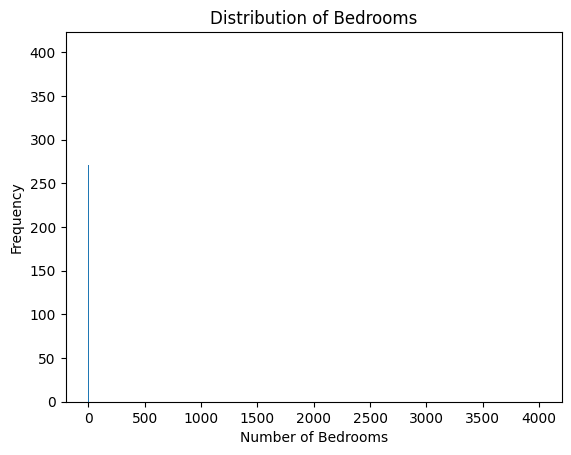

In [32]:
# Calculate the count of each unique value of Bedrooms

bedroom_counts = df_new1['Bedrooms'].value_counts()

# Plot the bar chart of Bedrooms distribution

plt.bar(bedroom_counts.index, bedroom_counts.values)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.title('Distribution of Bedrooms')
plt.show()

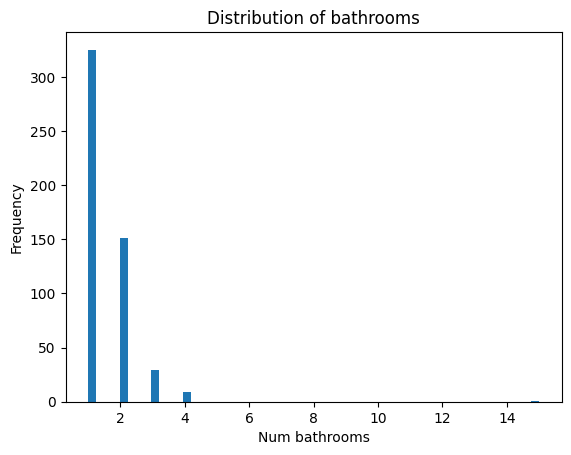

Number of missing values in Bedrooms: 1019


In [33]:
# Plot the distribution of Floor

plt.hist(df_new1['Bathrooms'].dropna(), bins='auto')
plt.xlabel('Num bathrooms')
plt.ylabel('Frequency')
plt.title('Distribution of bathrooms')
plt.show()

# Count the number of missing values in Floor

missing_bedrooms = df_new1['Bathrooms'].isnull().sum()
print(f"Number of missing values in Bedrooms: {missing_bedrooms}")

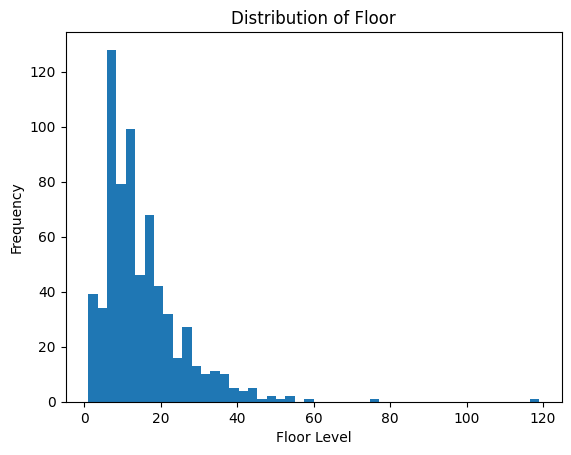

Number of missing values in Floor: 857


In [34]:
# Plot the distribution of Floor

plt.hist(df_new1['Floor'].dropna(), bins='auto')
plt.xlabel('Floor Level')
plt.ylabel('Frequency')
plt.title('Distribution of Floor')
plt.show()

# Count the number of missing values in Floor

missing_floor = df_new1['Floor'].isnull().sum()
print(f"Number of missing values in Floor: {missing_floor}")


## 2.2 Fix Missing and Duplicate Values

In [35]:
df_new1.duplicated().sum()

28

In [36]:
df_new1.drop_duplicates(subset=df_new1, keep='first', inplace =True)

In [37]:
df_new1.shape

(1506, 8)

In [38]:
df_new1.columns

Index(['Locations ', 'Posted ', 'Size(m2)', 'Price', 'Sub Location',
       'Bedrooms', 'Bathrooms', 'Floor'],
      dtype='object')

In [39]:
Numerical_columns =['Size(m2)', 'Price','Bedrooms', 'Bathrooms',
       'Floor'] 

In [40]:
df_new1

,Locations,Posted,Size(m2),Price,Sub Location,Bedrooms,Bathrooms,Floor
0,Phnom Penh,06-Jul-23,34.0,58000.0,Toul Kork,1.0,1.0,6.0
1,Phnom Penh,06-Jul-23,58.0,75000.0,Sen Sok,NaN,NaN,19.0
2,Phnom Penh,03-Jul-23,34.0,42000.0,Chamkar Mon,NaN,NaN,15.0
3,Phnom Penh,03-Jul-23,34.0,800.0,Chamkar Mon,1.0,NaN,NaN
4,Phnom Penh,09-Apr-23,57.0,72000.0,Chamkar Mon,1.0,1.0,9.0
...,...,...,...,...,...,...,...,...
1542,Phnom Penh,07-Jul-23,57.0,900.0,Chamkar Mon,1.0,1.0,31.0
1543,Phnom Penh,08-Jul-23,298616.0,17900.0,Chamkar Mon,2.0,NaN,NaN
1544,Phnom Penh,07-Jul-23,119.0,350000.0,Sen Sok,3.0,2.0,24.0
1545,Phnom Penh,07-Jul-23,32.0,10000.0,Russey Keo,1.0,1.0,NaN


In [41]:
colunms_effective = ['Locations ''Size(m2)', 'Price', 'Sub Location', 'Bedrooms',
       'Bathrooms', 'Floor']

In [42]:
df_new1['Posted ']=pd.to_datetime(df_new1['Posted '])

C:\Users\ASUS VivoBook15\AppData\Local\Temp\ipykernel_10456\3168295116.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_new1['Posted ']=pd.to_datetime(df_new1['Posted '])


## Testing LabelEncoder

In [43]:
df_new2 = df_new1.copy()

In [44]:
from sklearn.preprocessing import LabelEncoder
label_location = LabelEncoder()
label_sub_location = LabelEncoder()

In [45]:
df_new2['Sub Location'] = label_sub_location.fit_transform(df_new1['Sub Location'])
df_new2['Locations ']= label_location.fit_transform(df_new1['Locations '])

## Fill Missing Values with Feature Bedrooms and Bathrooms

In [46]:
df_new2.head()

,Locations,Posted,Size(m2),Price,Sub Location,Bedrooms,Bathrooms,Floor
0,1,2023-07-06,34.0,58000.0,15,1.0,1.0,6.0
1,1,2023-07-06,58.0,75000.0,11,NaN,NaN,19.0
2,1,2023-07-03,34.0,42000.0,1,NaN,NaN,15.0
3,1,2023-07-03,34.0,800.0,1,1.0,NaN,NaN
4,1,2023-04-09,57.0,72000.0,1,1.0,1.0,9.0


In [47]:
import numpy as np
from sklearn.impute import KNNImputer

In [48]:
import numpy as np
imputer = KNNImputer(n_neighbors=5,weights="distance")

In [49]:
df_new3 = df_new2.copy()

In [50]:
df_new3=pd.DataFrame(np.round(imputer.fit_transform(df_new2[['Locations ','Size(m2)', 'Price', 'Sub Location',
       'Bedrooms', 'Bathrooms', 'Floor']])),columns=['Locations ','Size(m2)', 'Price', 'Sub Location',
       'Bedrooms', 'Bathrooms', 'Floor'], dtype=int)

In [51]:
df_new3['Size(m2)'] = df_new3['Size(m2)'].astype(float)
df_new3['Price'] = df_new3['Price'].astype(float)

In [52]:
df_new3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Locations     1506 non-null   int32  
 1   Size(m2)      1506 non-null   float64
 2   Price         1506 non-null   float64
 3   Sub Location  1506 non-null   int32  
 4   Bedrooms      1506 non-null   int32  
 5   Bathrooms     1506 non-null   int32  
 6   Floor         1506 non-null   int32  
dtypes: float64(2), int32(5)
memory usage: 53.1 KB


In [53]:
df_new3['Posted '] = df_new2['Posted ']

In [54]:
matrix_corr_test = df_new3.corr()
matrix_corr_test

,Locations,Size(m2),Price,Sub Location,Bedrooms,Bathrooms,Floor,Posted
Locations,1.000000,-0.006006,-0.005636,0.243788,-0.007983,0.093900,-0.018311,-0.019903
Size(m2),-0.006006,1.000000,0.126998,-0.025143,-0.001928,-0.003355,-0.015460,0.003002
Price,-0.005636,0.126998,1.000000,-0.017273,-0.001630,0.100608,0.073954,-0.033860
Sub Location,0.243788,-0.025143,-0.017273,1.000000,0.003456,0.040107,-0.046281,-0.009046
Bedrooms,-0.007983,-0.001928,-0.001630,0.003456,1.000000,-0.014813,-0.016159,0.006664
Bathrooms,0.093900,-0.003355,0.100608,0.040107,-0.014813,1.000000,0.193386,-0.066991
Floor,-0.018311,-0.015460,0.073954,-0.046281,-0.016159,0.193386,1.000000,0.013480
Posted,-0.019903,0.003002,-0.033860,-0.009046,0.006664,-0.066991,0.013480,1.000000


In [55]:
import seaborn as sns

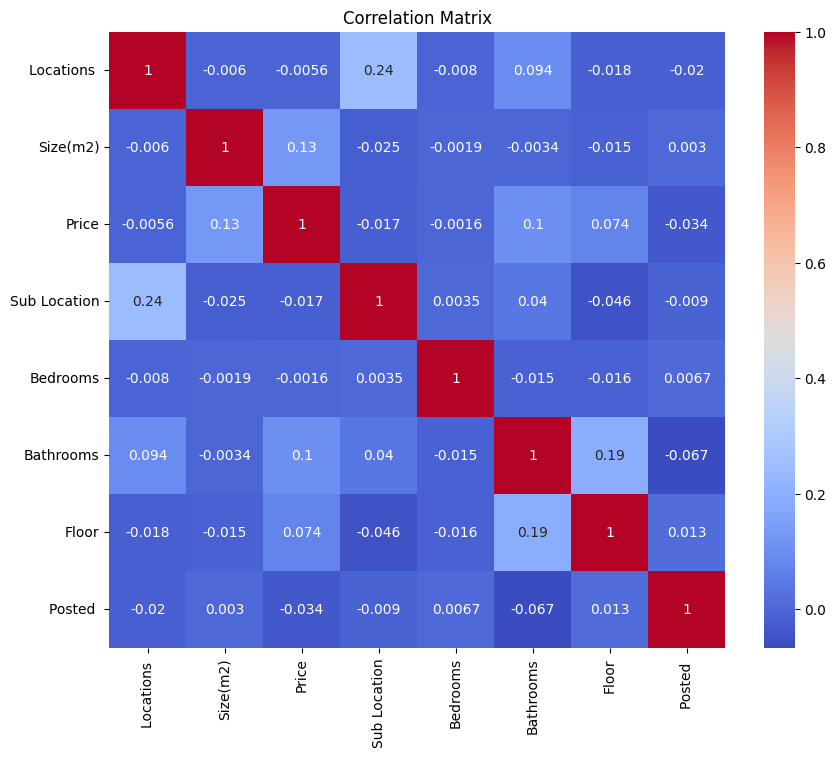

In [56]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr_test, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## 3. Checking Outliers and Duplicated  values

In [57]:
import seaborn as sns

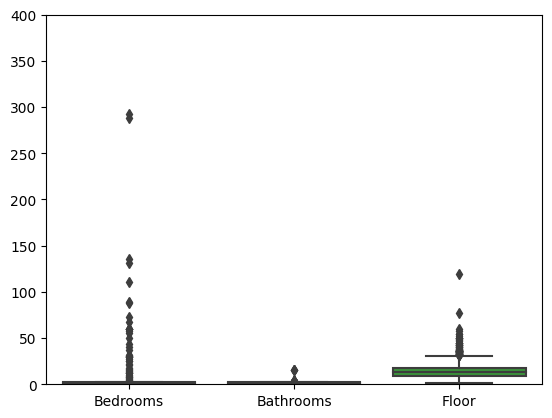

In [58]:
# Plot box plots for each numerical feature
# Plot box plots for each numerical feature

sns.boxplot(data=df_new3[['Bedrooms', 'Bathrooms', 'Floor']])
plt.ylim(0, 400)
plt.show()

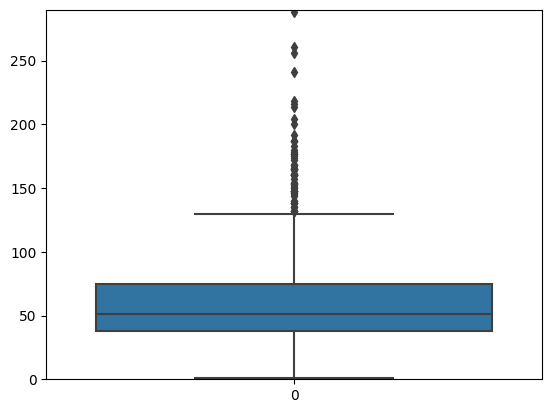

In [59]:
# Plot box plots for each numerical feature
# Plot box plots for each numerical feature

sns.boxplot(data=df_new3['Size(m2)'])
plt.ylim(0, 290)
plt.show()

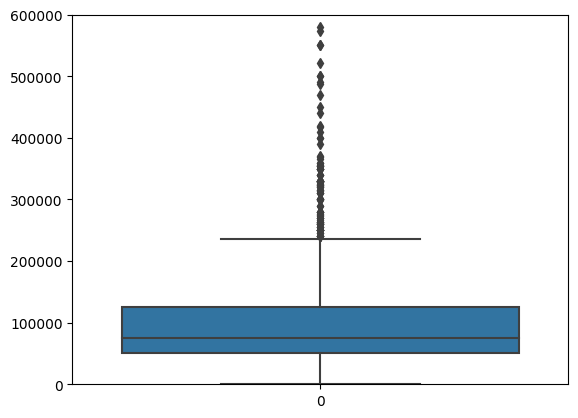

In [60]:
# Plot box plots for each numerical feature
# Plot box plots for each numerical feature

sns.boxplot(data=df_new3['Price'])
plt.ylim(0, 600000)
plt.show()

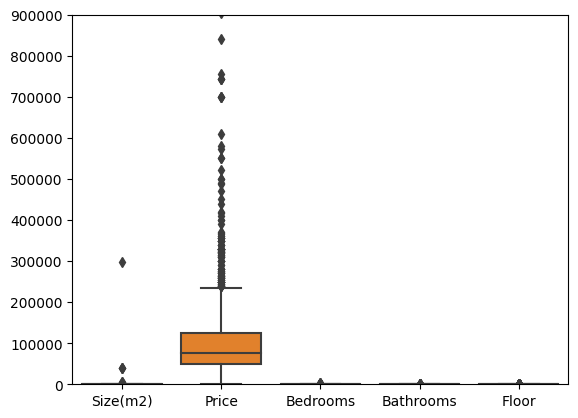

In [61]:
# Plot box plots for each numerical feature
# Plot box plots for each numerical feature

sns.boxplot(data=df_new3[Numerical_columns])
plt.ylim(0, 900000)
plt.show()

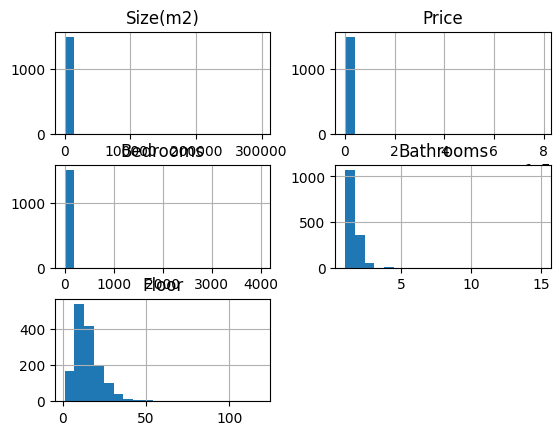

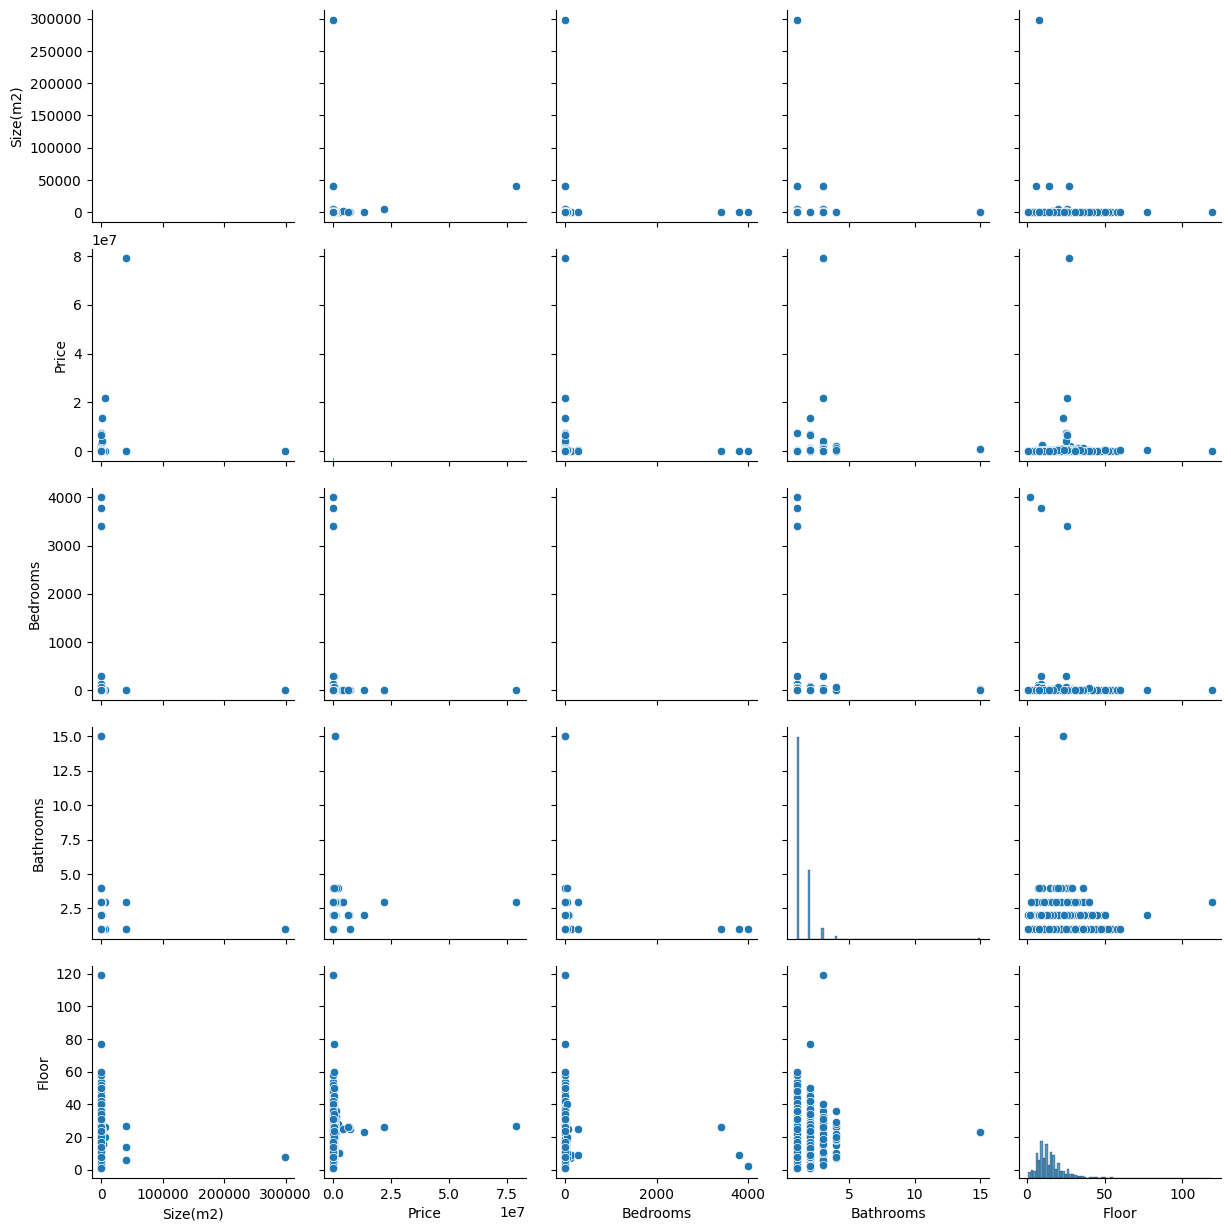

In [62]:
# Plot histograms for each numerical feature

df_new3[Numerical_columns].hist(bins=20)
plt.show()

# Plot scatter plots for pairwise numerical features

sns.pairplot(df_new3[Numerical_columns])
plt.show()

In [63]:
df_new3.shape

(1506, 8)

In [64]:
All_Columns = ['Size(m2)', 'Price', 'Sub Location',
       'Bedrooms', 'Bathrooms', 'Floor']

In [65]:
# Calculate IQR for each numerical feature

Q1 = df_new3[All_Columns].quantile(0.25)
Q3 = df_new3[All_Columns].quantile(0.75)
IQR = Q3 - Q1

# Define threshold for outlier detection

threshold = 1.5

# Find outliers

outliers = ((df_new3[All_Columns] < (Q1 - threshold * IQR)) |
            (df_new3[All_Columns] > (Q3 + threshold * IQR))).any(axis=1)
outlier_data = df_new3[All_Columns][outliers]
outlier_data

,Size(m2),Price,Sub Location,Bedrooms,Bathrooms,Floor
20,45.0,0.0,1,1,1,38
22,175.0,914985.0,1,4,4,26
23,50.0,84375.0,1,1,1,45
32,154.0,999000.0,0,2,3,26
39,166.0,330000.0,1,3,2,77
...,...,...,...,...,...,...
1489,127.0,323000.0,1,3,2,26
1497,47.0,68000.0,1,44,1,10
1498,354.0,488000.0,1,60,4,20
1502,298616.0,17900.0,1,2,1,8


## Drop Outlier values

In [66]:
# Remove outliers from the DataFrame

df_new3 = df_new3[~outliers]
df_new3.shape

(1251, 8)

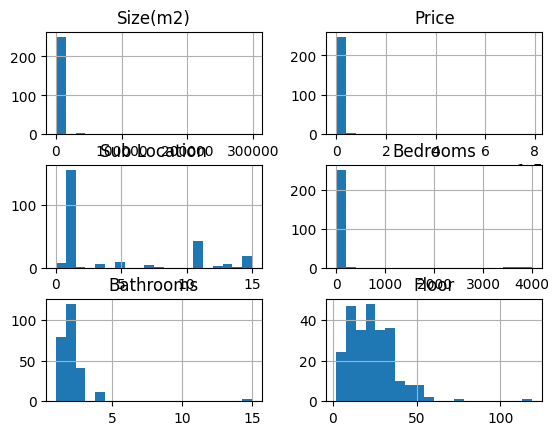

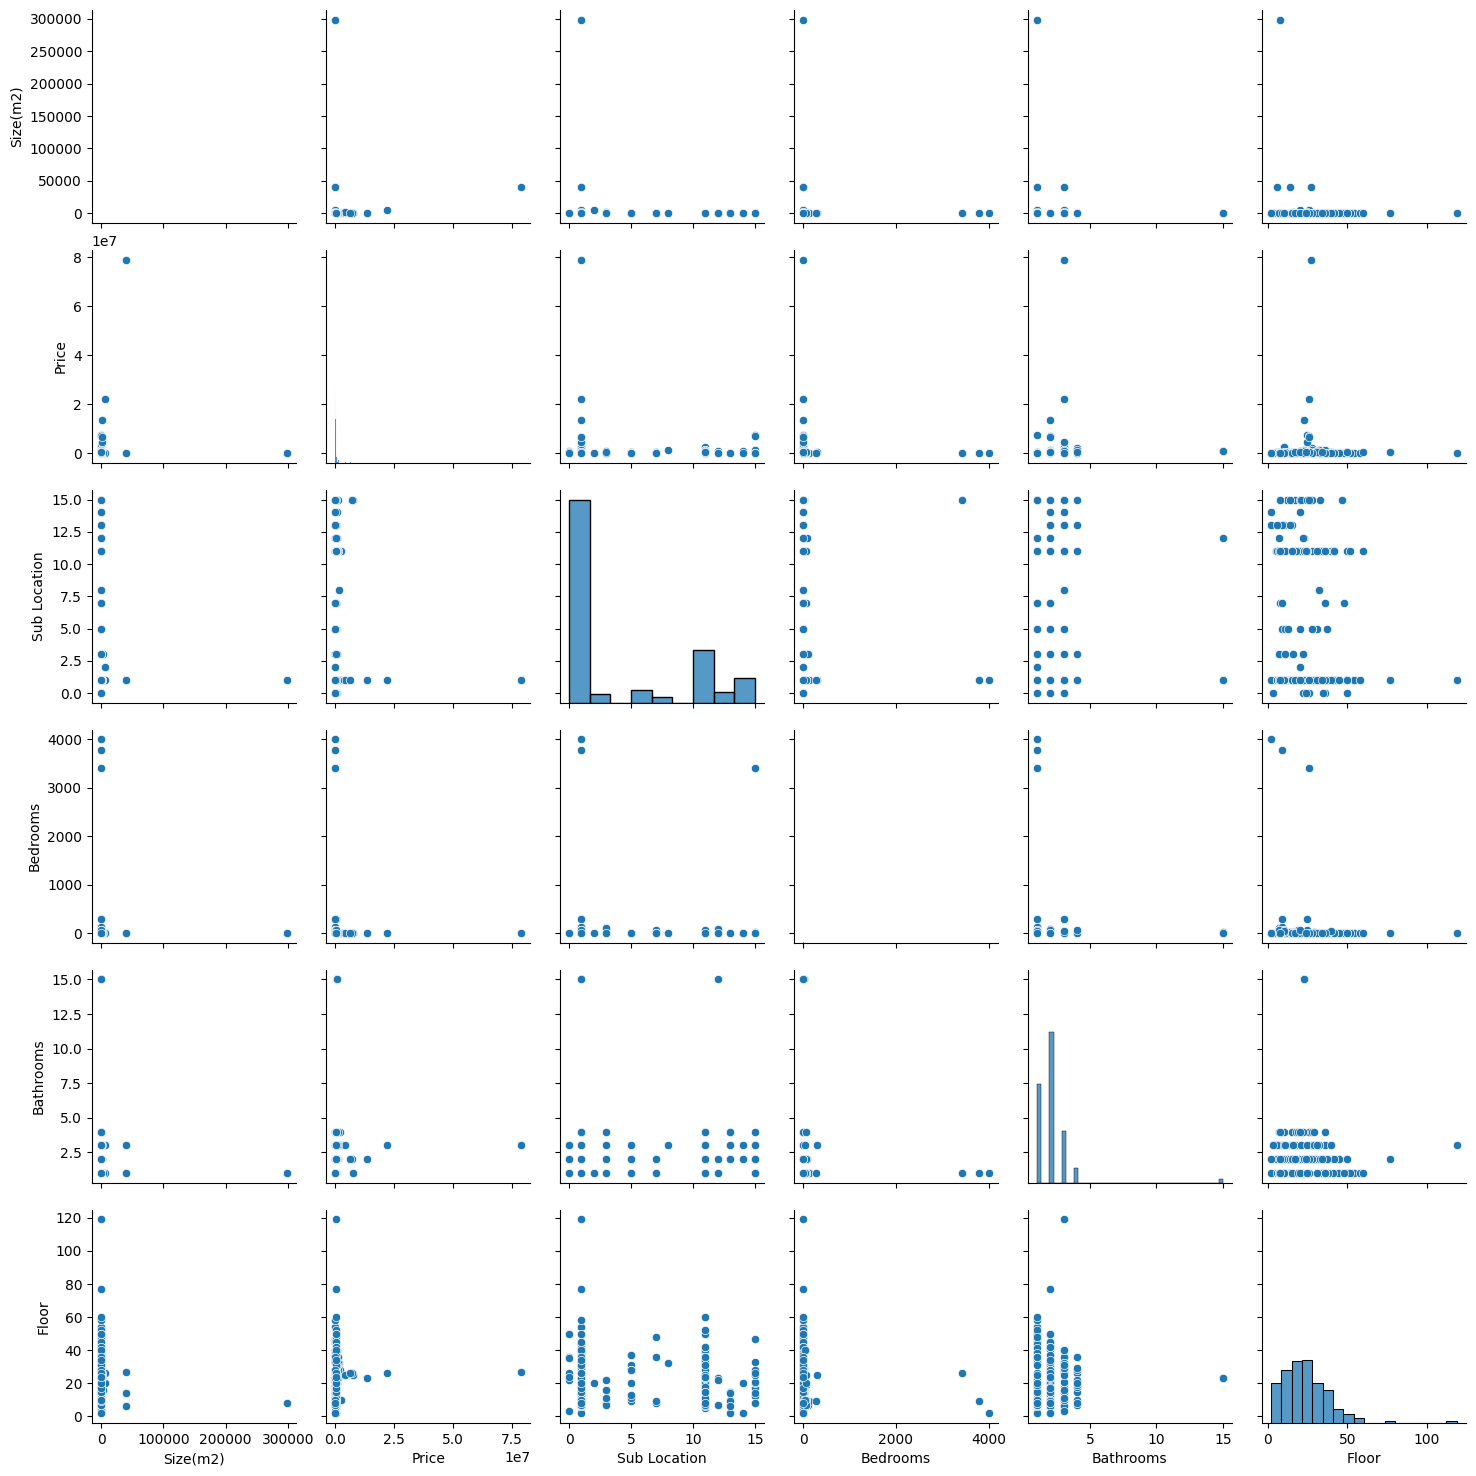

In [67]:
# Plot histograms for each numerical feature

outlier_data.hist(bins=20)
plt.show()

# Plot scatter plots for pairwise numerical features

sns.pairplot(outlier_data)
plt.show()

In [68]:
df_new3 = df_new3.drop(df_new3[df_new3['Price'] < 5000].index)

In [69]:
df_new3.columns

Index(['Locations ', 'Size(m2)', 'Price', 'Sub Location', 'Bedrooms',
       'Bathrooms', 'Floor', 'Posted '],
      dtype='object')

In [70]:
df.drop_duplicates(subset=['Locations ', 'Size(m2)', 'Price', 'Sub Location', 'Bedrooms',
       'Bathrooms', 'Floor', 'Posted '], keep='first', inplace =True)

In [71]:
df_new3=df_new3.dropna(subset = ['Locations ', 'Size(m2)', 'Price', 'Sub Location', 'Bedrooms',
       'Bathrooms', 'Floor', 'Posted '])

In [72]:
df_new3.duplicated().sum()

8

In [73]:
df_new3.isnull().sum()

Locations       0
Size(m2)        0
Price           0
Sub Location    0
Bedrooms        0
Bathrooms       0
Floor           0
Posted          0
dtype: int64

In [74]:
df_new3.shape

(1072, 8)

In [75]:
matrix_corr = df_new3[['Locations ', 'Size(m2)', 'Price', 'Sub Location', 'Bedrooms',
       'Bathrooms', 'Floor']].corr()
matrix_corr

,Locations,Size(m2),Price,Sub Location,Bedrooms,Bathrooms,Floor
Locations,1.000000,0.170646,0.181918,0.249020,0.121825,0.110408,0.051994
Size(m2),0.170646,1.000000,0.713162,-0.015392,0.581855,0.572028,0.081549
Price,0.181918,0.713162,1.000000,-0.022737,0.499167,0.457539,0.248376
Sub Location,0.249020,-0.015392,-0.022737,1.000000,0.102729,0.047985,-0.036004
Bedrooms,0.121825,0.581855,0.499167,0.102729,1.000000,0.529902,0.066741
Bathrooms,0.110408,0.572028,0.457539,0.047985,0.529902,1.000000,0.108762
Floor,0.051994,0.081549,0.248376,-0.036004,0.066741,0.108762,1.000000


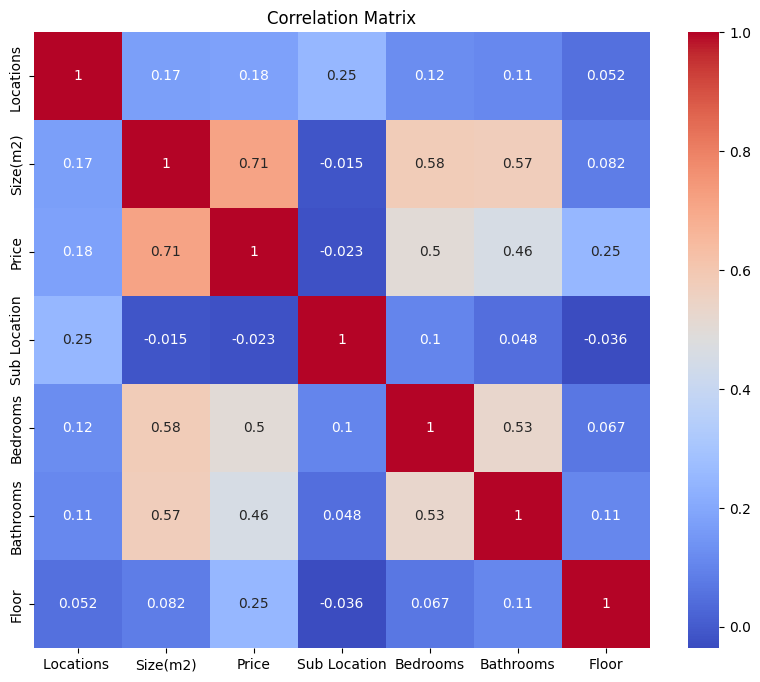

In [76]:
# Plot the correlation matrix using a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## Data Analysis

In [77]:
data = df_new3.copy()
data.head()


,Locations,Size(m2),Price,Sub Location,Bedrooms,Bathrooms,Floor,Posted
0,1,34.0,58000.0,15,1,1,6,2023-07-06
1,1,58.0,75000.0,11,1,1,19,2023-07-06
2,1,34.0,42000.0,1,1,1,15,2023-07-03
4,1,57.0,72000.0,1,1,1,9,2023-04-09
5,1,33.0,59000.0,3,1,1,25,2023-05-09


In [78]:
data['Locations ']= label_location.inverse_transform(data['Locations '])
data['Sub Location']= label_sub_location.inverse_transform(data['Sub Location'])

In [79]:
data.groupby("Locations ")["Sub Location"].value_counts()

Locations       Sub Location   
Kandal          Takhmao              9
Phnom Penh      Chamkar Mon        631
                Sen Sok            151
                Toul Kork           78
                Chroy Changvar      41
                Pur Senchey         23
                Boeng Keng Kang     20
                Mean Chey           19
                Daun Penh           14
                Prampir Makara      12
                Chbar Ampov         10
                Russey Keo           7
Preah Sihanouk  Sihanoukville       23
                Prey Nob            12
Siem Reap       Svay Dangkum        21
Takeo           Daun Keo             1
Name: count, dtype: int64

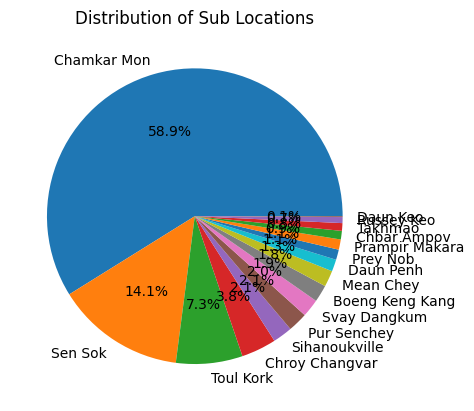

In [80]:
# Calculate the value counts

value_counts = data["Sub Location"].value_counts()

# Plot the value counts as a pie chart

plt.pie(value_counts.values, labels=value_counts.index, autopct="%.1f%%")

# Add a title

plt.title("Distribution of Sub Locations")

# Show the plot

plt.show()


In [81]:
# What is the average size of the properties in the dataset?

average_size = data['Size(m2)'].mean()
print("Average property size: ", average_size)

Average property size:  53.74626865671642


In [82]:
# How does the price vary across different locations?

price_by_location = data.groupby('Locations ')['Price'].mean()
print("Price by Location:\n", price_by_location)

Price by Location:
 Locations 
Kandal             29962.777778
Phnom Penh         86807.785288
Preah Sihanouk     82840.342857
Siem Reap         146414.190476
Takeo             225000.000000
Name: Price, dtype: float64


In [83]:
# How does the price vary across different sub-locations?

price_by_sublocation = data.groupby('Sub Location')['Price'].mean()
print("Price by Sub Location:\n", price_by_sublocation)

Price by Sub Location:
 Sub Location
Boeng Keng Kang    100850.000000
Chamkar Mon         86680.153724
Chbar Ampov         75608.800000
Chroy Changvar      92284.390244
Daun Keo           225000.000000
Daun Penh          105792.714286
Mean Chey           78157.789474
Prampir Makara     130383.333333
Prey Nob            95624.333333
Pur Senchey         66147.782609
Russey Keo          45047.428571
Sen Sok             94555.172185
Sihanoukville       76170.434783
Svay Dangkum       146414.190476
Takhmao             29962.777778
Toul Kork           69633.961538
Name: Price, dtype: float64


In [84]:
# What is the most common number of bedrooms in the dataset?

most_common_bedrooms = data['Bedrooms'].mode().values[0]
print("Most common number of bedrooms: ", most_common_bedrooms)

Most common number of bedrooms:  1


In [85]:
# Which sub-location has the highest average price?

highest_avg_price_sublocation = price_by_sublocation.idxmax()
print("Sub Location with the highest average price: ", highest_avg_price_sublocation)

Sub Location with the highest average price:  Daun Keo


In [86]:
# What is the minimum and maximum price in the dataset?

min_price = data['Price'].min()
max_price = data['Price'].max()
print("Minimum price: ", min_price)
print("Maximum price: ", max_price)

Minimum price:  5000.0
Maximum price:  235000.0


In [87]:
# 15. Is there a difference in prices between properties posted in different months?

data['Posted_month'] = data['Posted '].dt.month
price_by_month = data.groupby('Posted_month')['Price'].mean()
print("Average price by month:\n", price_by_month)

Average price by month:
 Posted_month
1    88601.018182
2    90168.293333
3    86346.267606
4    90597.292683
5    85949.806250
6    84785.608392
7    89217.239067
Name: Price, dtype: float64


In [88]:
# How does the average floor level differ across sub-locations?

avg_floor_by_sublocation = data.groupby('Sub Location')['Floor'].mean()
print("Average floor level by Sub Location:\n", avg_floor_by_sublocation)

Average floor level by Sub Location:
 Sub Location
Boeng Keng Kang    14.350000
Chamkar Mon        12.879556
Chbar Ampov        12.800000
Chroy Changvar     13.268293
Daun Keo           19.000000
Daun Penh          13.000000
Mean Chey          11.315789
Prampir Makara     12.750000
Prey Nob           14.083333
Pur Senchey        14.130435
Russey Keo          8.428571
Sen Sok            13.059603
Sihanoukville      13.043478
Svay Dangkum       13.809524
Takhmao             8.555556
Toul Kork          11.666667
Name: Floor, dtype: float64


In [89]:
# What is the most common combination of bedrooms and bathrooms in the dataset?

common_bedrooms_bathrooms = data[['Bedrooms', 'Bathrooms']].mode().values[0]
print("Most common combination of bedrooms and bathrooms: ", common_bedrooms_bathrooms)


Most common combination of bedrooms and bathrooms:  [1 1]


In [90]:
# How does the price vary with the floor level?

price_by_floor = data.groupby('Floor')['Price'].mean()
print("Average price by floor level:\n", price_by_floor)

Average price by floor level:
 Floor
1      82910.083333
2     116238.800000
3      39423.562500
4      53521.444444
5      60932.966667
6      78249.102041
7      77925.235294
8      69979.493506
9     103633.296296
10     76441.785714
11     79324.053763
12     76538.789474
13     80385.771429
14     91191.490909
15     84509.900000
16    100460.909091
17     93367.949153
18    110694.600000
19    107668.594595
20    125886.352941
21    119452.450000
22    114025.666667
23     76560.357143
24    116414.333333
25    124199.900000
26     86181.142857
27    127840.000000
28    125149.454545
29    102988.888889
30     90372.500000
31    113600.000000
Name: Price, dtype: float64


In [91]:
#Divide Categorical in Dataset

Location_counts = data['Sub Location'].value_counts()

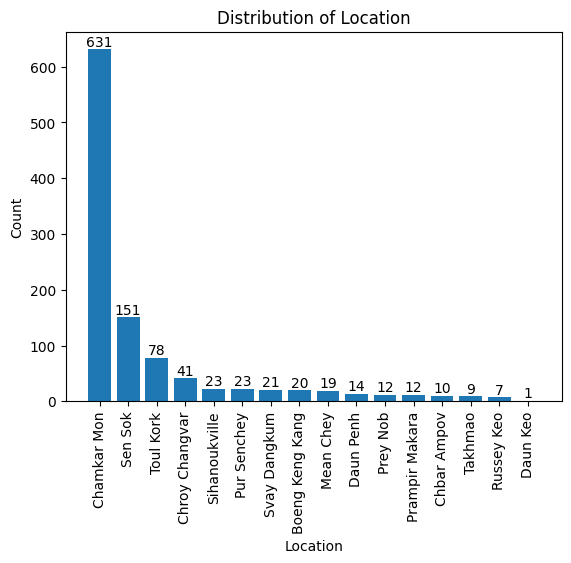

In [92]:
# Plot the graph

plt.bar(Location_counts.index, Location_counts.values)
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Distribution of Location')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed

# Add count numbers on top of the bars

for i, count in enumerate(Location_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [93]:
# Selecting the numeric features

numeric_features = ['Bedrooms', 'Bathrooms', 'Size(m2)', 'Price']

# Calculating the range for each feature

range_values = data[numeric_features].agg(['min', 'max'])
range_values

,Bedrooms,Bathrooms,Size(m2),Price
min,1,1,5.0,5000.0
max,3,3,130.0,235000.0


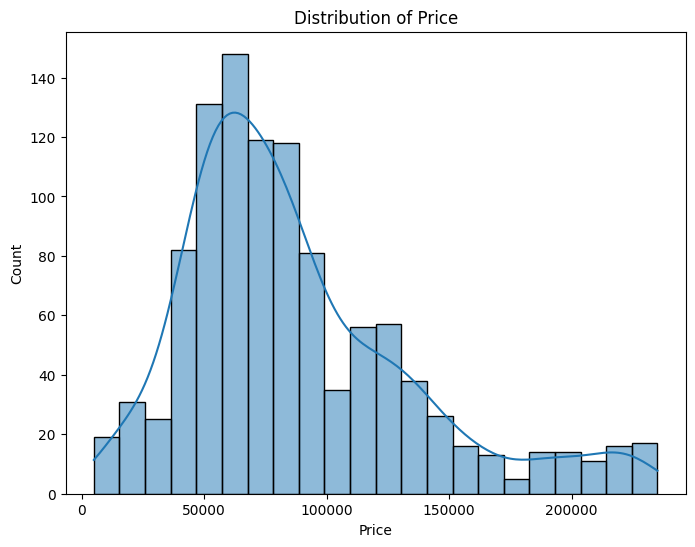

In [94]:
plt.figure(figsize=(8, 6))

# Plotting the distribution of Price

sns.histplot(data=data, x='Price', kde=True)

# Adding labels and title to the plot

plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Price')

# Displaying the plot

plt.show()

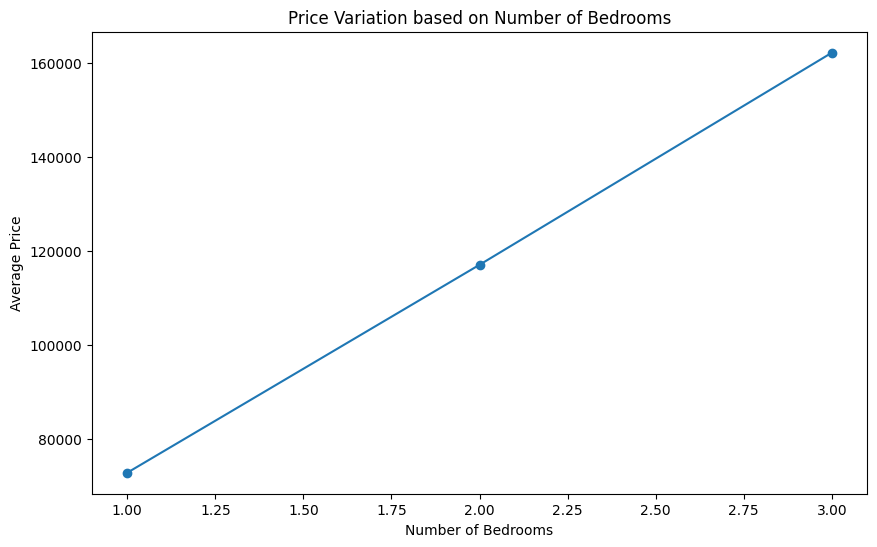

In [95]:
# Group the dataset by the number of bedrooms and calculate the average price

price_by_bedrooms = data.groupby('Bedrooms')['Price'].mean()

# Plot the average price variation based on the number of bedrooms

plt.figure(figsize=(10, 6))
plt.plot(price_by_bedrooms.index, price_by_bedrooms.values, marker='o')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.title('Price Variation based on Number of Bedrooms')
plt.show()

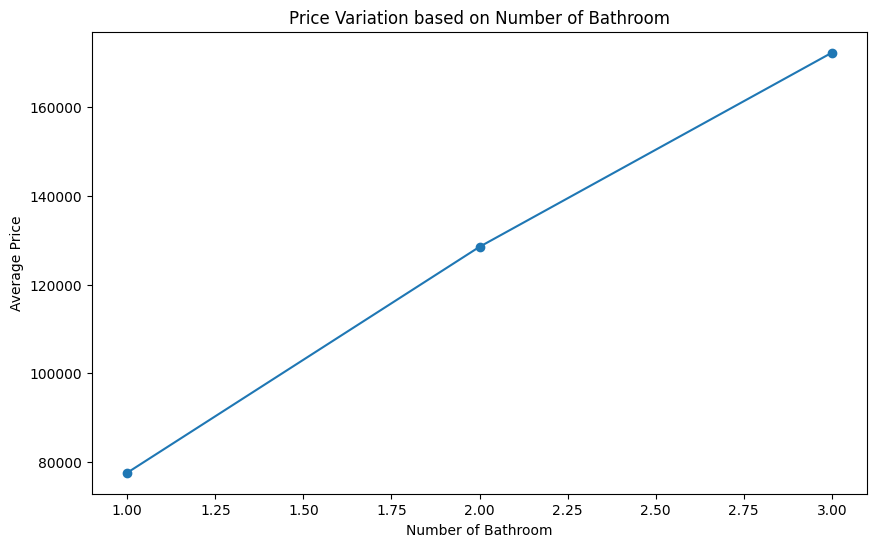

In [96]:
# Group the dataset by the number of bedrooms and calculate the average price

price_by_bedrooms = data.groupby('Bathrooms')['Price'].mean()

# Plot the average price variation based on the number of Bathroom

plt.figure(figsize=(10, 6))
plt.plot(price_by_bedrooms.index, price_by_bedrooms.values, marker='o')
plt.xlabel('Number of Bathroom')
plt.ylabel('Average Price')
plt.title('Price Variation based on Number of Bathroom')
plt.show()

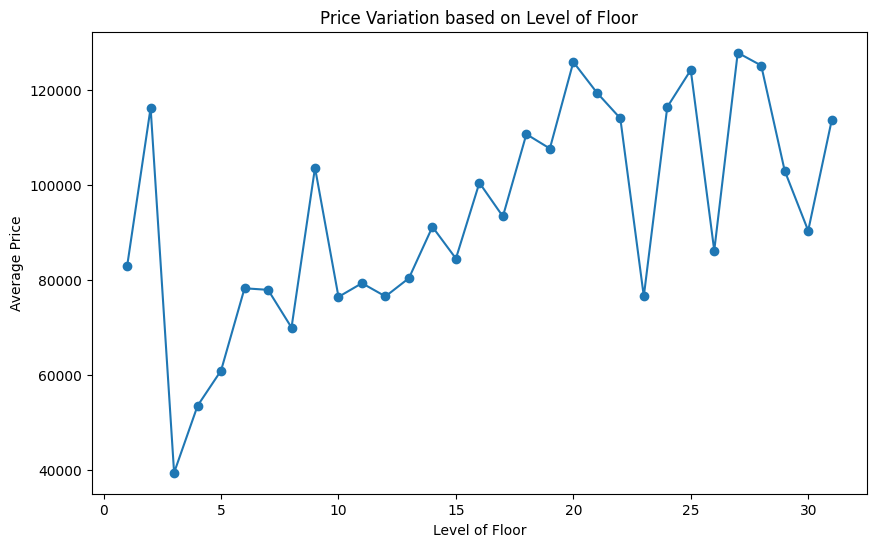

In [97]:
# Group the dataset by the number of bedrooms and calculate the average price

price_by_bedrooms = data.groupby('Floor')['Price'].mean()

# Plot the average price variation based on the number of Bathroom

plt.figure(figsize=(10, 6))
plt.plot(price_by_bedrooms.index, price_by_bedrooms.values, marker='o')
plt.xlabel('Level of Floor')
plt.ylabel('Average Price')
plt.title('Price Variation based on Level of Floor')
plt.show()

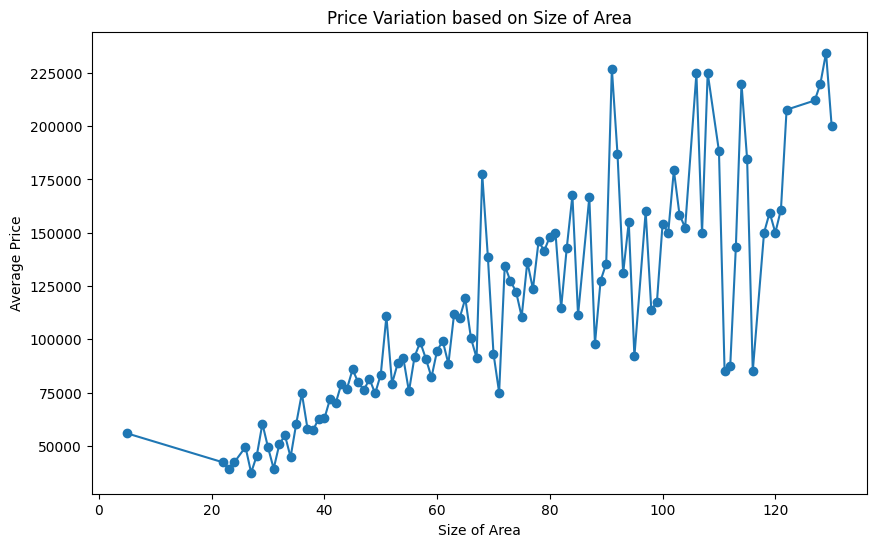

In [98]:
# Group the dataset by the number of bedrooms and calculate the average price

price_by_bedrooms = data.groupby('Size(m2)')['Price'].mean()

# Plot the average price variation based on the number of Bathroom

plt.figure(figsize=(10, 6))
plt.plot(price_by_bedrooms.index, price_by_bedrooms.values, marker='o')
plt.xlabel('Size of Area')
plt.ylabel('Average Price')
plt.title('Price Variation based on Size of Area')
plt.show()

## 3. Model Improving

## 3.1 Feature Engineering

In [99]:
data

,Locations,Size(m2),Price,Sub Location,Bedrooms,Bathrooms,Floor,Posted,Posted_month
0,Phnom Penh,34.0,58000.0,Toul Kork,1,1,6,2023-07-06,7
1,Phnom Penh,58.0,75000.0,Sen Sok,1,1,19,2023-07-06,7
2,Phnom Penh,34.0,42000.0,Chamkar Mon,1,1,15,2023-07-03,7
4,Phnom Penh,57.0,72000.0,Chamkar Mon,1,1,9,2023-04-09,4
5,Phnom Penh,33.0,59000.0,Chroy Changvar,1,1,25,2023-05-09,5
...,...,...,...,...,...,...,...,...,...
1496,Phnom Penh,30.0,39900.0,Pur Senchey,1,1,8,2023-07-05,7
1499,Phnom Penh,44.0,60000.0,Chroy Changvar,1,1,11,2023-07-07,7
1500,Phnom Penh,32.0,13000.0,Sen Sok,1,1,8,2023-07-01,7
1504,Phnom Penh,32.0,10000.0,Russey Keo,1,1,17,2023-07-03,7


In [100]:
# pip install catboost

In [101]:
df_new3.columns

Index(['Locations ', 'Size(m2)', 'Price', 'Sub Location', 'Bedrooms',
       'Bathrooms', 'Floor', 'Posted '],
      dtype='object')

In [102]:
df_new3

,Locations,Size(m2),Price,Sub Location,Bedrooms,Bathrooms,Floor,Posted
0,1,34.0,58000.0,15,1,1,6,2023-07-06
1,1,58.0,75000.0,11,1,1,19,2023-07-06
2,1,34.0,42000.0,1,1,1,15,2023-07-03
4,1,57.0,72000.0,1,1,1,9,2023-04-09
5,1,33.0,59000.0,3,1,1,25,2023-05-09
...,...,...,...,...,...,...,...,...
1496,1,30.0,39900.0,9,1,1,8,2023-07-05
1499,1,44.0,60000.0,3,1,1,11,2023-07-07
1500,1,32.0,13000.0,11,1,1,8,2023-07-01
1504,1,32.0,10000.0,10,1,1,17,2023-07-03


In [103]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

X = df_new3[['Locations ', 'Size(m2)','Sub Location', 'Bedrooms',
       'Bathrooms', 'Floor']]
y = df_new3['Price']

model = RandomForestRegressor()
selector = SelectFromModel(model)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
correlation_selection = df_new3[selected_features.tolist() + ['Price']].corr()
print(correlation_selection)

          Size(m2)     Floor     Price
Size(m2)  1.000000  0.081549  0.713162
Floor     0.081549  1.000000  0.248376
Price     0.713162  0.248376  1.000000


## 3.1.1 Data Preprocessing

In [104]:
new_df=data.copy()
new_df.columns

Index(['Locations ', 'Size(m2)', 'Price', 'Sub Location', 'Bedrooms',
       'Bathrooms', 'Floor', 'Posted ', 'Posted_month'],
      dtype='object')

In [105]:
new_df.drop(['Posted ', 'Posted_month'], axis =1, inplace=True)

In [106]:
# Categorical Features

categorical_features =new_df.select_dtypes(include=['object', 'category']).columns
categorical_features

Index(['Locations ', 'Sub Location'], dtype='object')

In [107]:
new_df_dummies = pd.get_dummies(columns=categorical_features, data=new_df)
new_df_dummies.head()

,Size(m2),Price,Bedrooms,Bathrooms,Floor,Locations _Kandal,Locations _Phnom Penh,Locations _Preah Sihanouk,Locations _Siem Reap,Locations _Takeo,...,Sub Location_Mean Chey,Sub Location_Prampir Makara,Sub Location_Prey Nob,Sub Location_Pur Senchey,Sub Location_Russey Keo,Sub Location_Sen Sok,Sub Location_Sihanoukville,Sub Location_Svay Dangkum,Sub Location_Takhmao,Sub Location_Toul Kork
0,34.0,58000.0,1,1,6,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,58.0,75000.0,1,1,19,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,34.0,42000.0,1,1,15,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,57.0,72000.0,1,1,9,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,33.0,59000.0,1,1,25,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 3.1.2 Scale Data

In [108]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [109]:
# Numerical feature

numerical_features = new_df.select_dtypes(exclude=['object','category']).columns
numerical_features

Index(['Size(m2)', 'Price', 'Bedrooms', 'Bathrooms', 'Floor'], dtype='object')

In [110]:
new_df_dummies[numerical_features] = scaler.fit_transform(new_df_dummies[numerical_features])

In [111]:
new_df_dummies_and_scaler = new_df_dummies.copy()
new_df_dummies_and_scaler

,Size(m2),Price,Bedrooms,Bathrooms,Floor,Locations _Kandal,Locations _Phnom Penh,Locations _Preah Sihanouk,Locations _Siem Reap,Locations _Takeo,...,Sub Location_Mean Chey,Sub Location_Prampir Makara,Sub Location_Prey Nob,Sub Location_Pur Senchey,Sub Location_Russey Keo,Sub Location_Sen Sok,Sub Location_Sihanoukville,Sub Location_Svay Dangkum,Sub Location_Takhmao,Sub Location_Toul Kork
0,-0.878176,-0.623373,-0.627318,-0.454026,-1.135238,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0.189176,-0.264111,-0.627318,-0.454026,1.024581,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,-0.878176,-0.961501,-0.627318,-0.454026,0.360021,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0.144703,-0.327510,-0.627318,-0.454026,-0.636818,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,-0.922649,-0.602240,-0.627318,-0.454026,2.021420,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,-1.056068,-1.005880,-0.627318,-0.454026,-0.802958,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1499,-0.433446,-0.581107,-0.627318,-0.454026,-0.304538,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1500,-0.967122,-1.574358,-0.627318,-0.454026,-0.802958,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1504,-0.967122,-1.637757,-0.627318,-0.454026,0.692301,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


## 4. Select Model toTrain and Testing

In [112]:
X = new_df_dummies_and_scaler.drop(columns=["Price"])
y = new_df_dummies_and_scaler["Price"]
X.shape, y.shape

((1072, 25), (1072,))

## 4.1 Splitting Data to Training and Testing

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state = 42)

In [115]:
print("x_train - >  ",x_train.shape)
print("x_test - >  ",x_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

x_train - >   (857, 25)
x_test - >   (215, 25)
y_train - >   (857,)
y_test - >   (215,)



<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
4.2Model Building
</p>
</div>

In [116]:
training_score = []
testing_score = []
model_name = []
Mean_square_error = []

In [117]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

def model_prediction(model):
    model.fit(x_train,y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    a = r2_score(y_train,y_train_pred)
    b = r2_score(y_test,y_test_pred)
#     test_accuracy_score = accuracy_score(y_test,y_test_pred)
#     train_accuracy_score =accuracy_score(y_train,y_train_pred)
    c = mean_squared_error(y_test_pred, y_test)
    
    
    model_name.append(str(model))
    training_score.append(a)
    testing_score.append(b)
    Mean_square_error.append(c)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)
#     print(f"Accuracy score of {model} model on Training Data is:",train_accuracy_score)
#     print(f"Accuracy score of {model} model on Testing Data is:",test_accuracy_score)
    print(f"MSE of {model} model on Testing Data is:", c)

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>1. Linear-Regression </b> Model</h2>

In [118]:
from sklearn.linear_model import LinearRegression
model_prediction(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 0.5747396786985406
r2_Score of LinearRegression() model on Testing Data is: 0.5186072436772733
MSE of LinearRegression() model on Testing Data is: 0.44407646185051547


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>2. Decision-Tree-Regressor </b> Model</h2>

In [119]:
from sklearn.tree import DecisionTreeRegressor
model_prediction(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 0.9804046967565062
r2_Score of DecisionTreeRegressor() model on Testing Data is: 0.025413211204945885
MSE of DecisionTreeRegressor() model on Testing Data is: 0.899039396106366


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>3. Random-Forest-Regressor </b> Model</h2>

In [120]:
from sklearn.ensemble import RandomForestRegressor
model_prediction(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 0.9223198031926814
r2_Score of RandomForestRegressor() model on Testing Data is: 0.45723456779499505
MSE of RandomForestRegressor() model on Testing Data is: 0.5006916900651862


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>4. Ada-Boost-Regressor </b> Model</h2>

In [121]:
from sklearn.ensemble import AdaBoostRegressor
model_prediction(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: 0.5831029997010996
r2_Score of AdaBoostRegressor() model on Testing Data is: 0.4376665185227355
MSE of AdaBoostRegressor() model on Testing Data is: 0.5187428758630797


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>5. Gradient-Boosting-Regressor </b> Model</h2>

In [122]:
from sklearn.ensemble import GradientBoostingRegressor
model_prediction(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 0.7211752097989401
r2_Score of GradientBoostingRegressor() model on Testing Data is: 0.5394676631851321
MSE of GradientBoostingRegressor() model on Testing Data is: 0.42483308694281946


In [123]:
# pip install lightgbm

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>6. LGMB Regressor </b> Model</h2>

In [124]:
from lightgbm import LGBMRegressor
model_prediction(LGBMRegressor())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 128
[LightGBM] [Info] Number of data points in the train set: 857, number of used features: 10
[LightGBM] [Info] Start training from score 0.012014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [125]:
# pip install xgboost

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>7. XGBRegressor </b> Model</h2>

In [126]:
from xgboost import XGBRegressor
model_prediction(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 0.9579938414616156
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
     

<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>8. Cat-Boost-Regressor </b> Model</h2>

In [127]:
from catboost import CatBoostRegressor
model_prediction(CatBoostRegressor(verbose=False))

r2_Score of <catboost.core.CatBoostRegressor object at 0x000001794423D210> model on Training Data is: 0.8563200189250066
r2_Score of <catboost.core.CatBoostRegressor object at 0x000001794423D210> model on Testing Data is: 0.5244916988692604
MSE of <catboost.core.CatBoostRegressor object at 0x000001794423D210> model on Testing Data is: 0.43864815407634594


<a id="1.3"></a>
<h2 style="font-family: Verdana; font-size: 22px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff;"><b>8. Lasso-Regressor </b> Model</h2>

In [128]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [129]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
model_prediction(lasso_regressor)

c:\Users\ASUS VivoBook15\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.080e+00, tolerance: 6.898e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\ASUS VivoBook15\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.674e-01, tolerance: 7.289e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\ASUS VivoBook15\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

r2_Score of GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error') model on Training Data is: 0.5595259595075364
r2_Score of GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error') model on Testing Data is: 0.5286842104461782
MSE of GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error') model on Testing Data is: 0.434780634918877


In [130]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.01}
-0.4550345109045765


C:\Users\ASUS VivoBook15\AppData\Local\Temp\ipykernel_10456\2365045258.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction_lasso)


<Axes: xlabel='Price', ylabel='Density'>

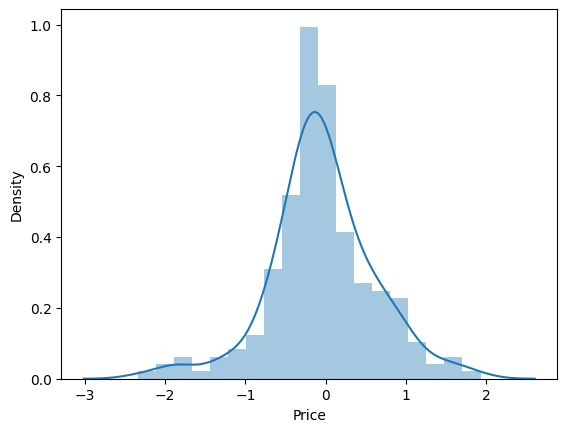

In [131]:
import seaborn as sns
prediction_lasso=lasso_regressor.predict(x_test)
sns.distplot(y_test-prediction_lasso)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
All Model Performance Comparison
</p>
</div>

In [132]:
new_df2 = pd.DataFrame({"Algorithms":model_name,
                   "Training Score":training_score,
                   "Testing Score":testing_score,
                   "Mean Square Error":Mean_square_error})
new_df2

,Algorithms,Training Score,Testing Score,Mean Square Error
0,LinearRegression(),0.574740,0.518607,0.444076
1,DecisionTreeRegressor(),0.980405,0.025413,0.899039
2,RandomForestRegressor(),0.922320,0.457235,0.500692
3,AdaBoostRegressor(),0.583103,0.437667,0.518743
4,GradientBoostingRegressor(),0.721175,0.539468,0.424833
5,LGBMRegressor(),0.803285,0.492251,0.468390
6,"XGBRegressor(base_score=None, booster=None, ca...",0.957994,0.393075,0.559878
7,<catboost.core.CatBoostRegressor object at 0x0...,0.856320,0.524492,0.438648
8,"GridSearchCV(cv=5, estimator=Lasso(),\n ...",0.559526,0.528684,0.434781


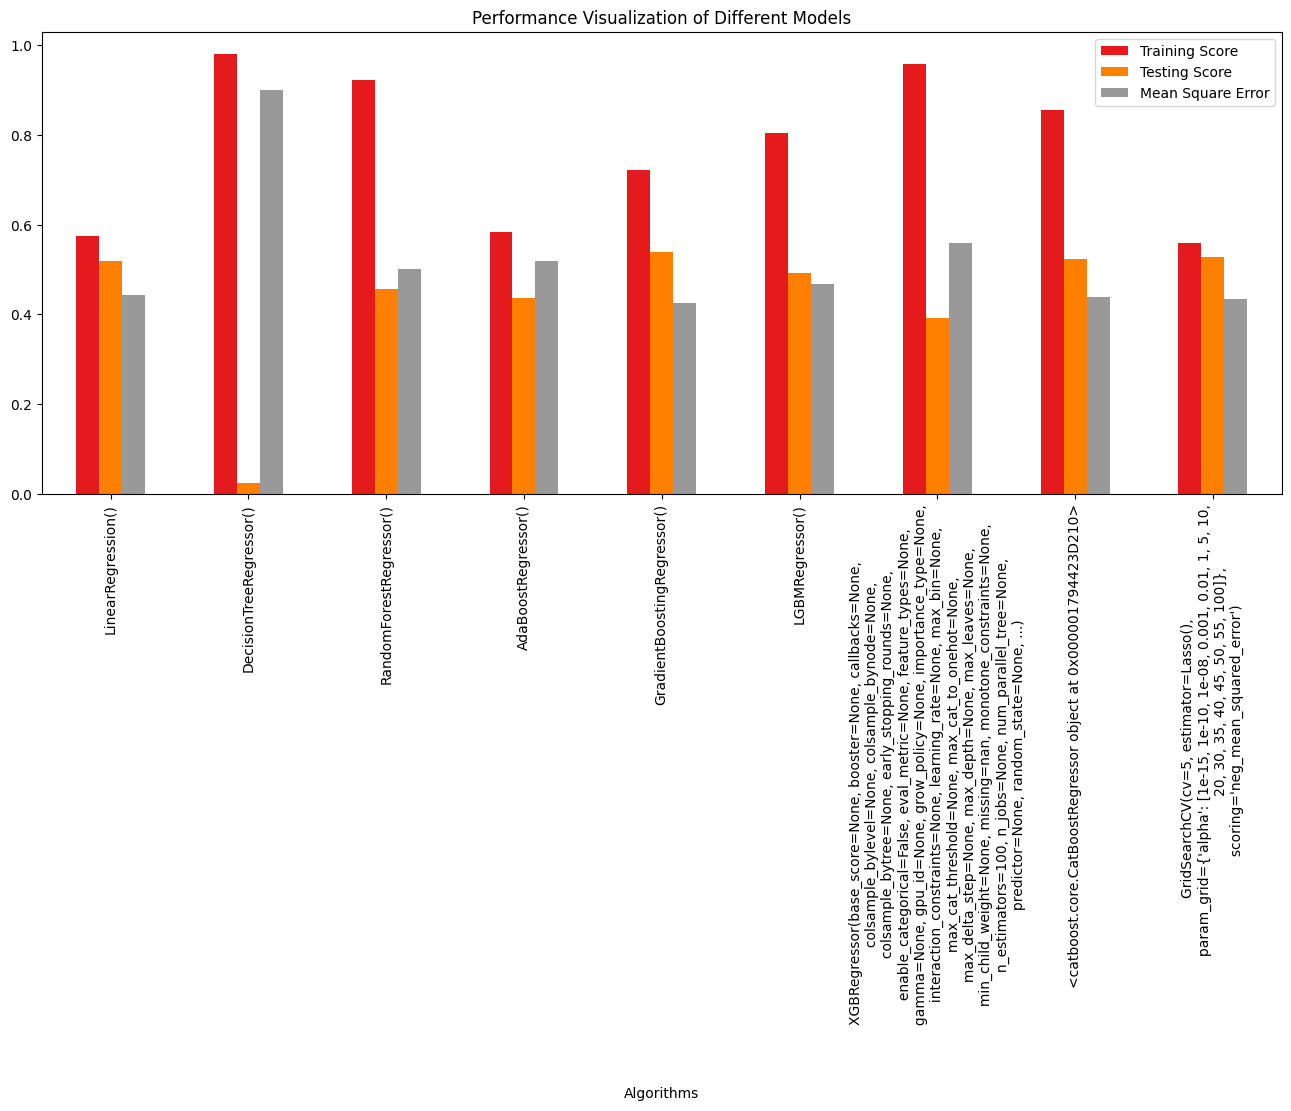

In [133]:
new_df2.plot(x="Algorithms",y=["Training Score","Testing Score","Mean Square Error"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

## 5. Model conclusion

Considering the performance all models above, the best model to choose depends on the specific requirements and priorities.

If the emphasis is on achieving the highest testing score, the Gradient Boosting Regressor (0.5395) or CatBoost Regressor (0.5245) might be good options.

If reducing mean square error is a priority, the Gradient Boosting Regressor (0.4248) or Lasso (0.4348) could be considered.

It's important to note that these conclusions are based solely on the provided performance metrics and there might be additional factors to consider, such as computational efficiency, interpretability, and the specific requirements of the application.